In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("iris.csv")
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [5]:
x = data.drop("species",axis=1)
y = data["species"]
scaled_x = StandardScaler().fit_transform(x)
scaled_x[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [6]:
features = scaled_x.T
cov_mat = np.cov(features)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [7]:
values,vectors = np.linalg.eig(cov_mat)
values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [8]:
vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [9]:
expl_variance = []
for i in values:
    expl_variance.append(i/sum(values)*100)
expl_variance

[72.96244541329987, 22.850761786701757, 3.6689218892828825, 0.5178709107154802]

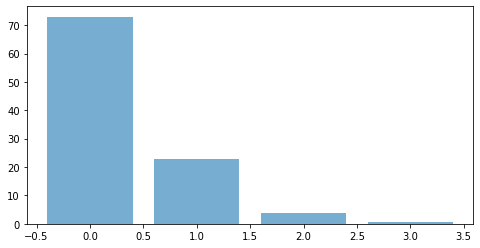

In [10]:
plt.figure(figsize = (8,4))
plt.bar(range(4),expl_variance,alpha = 0.6)
plt.ylabel = "Percentage of explained variance"
plt.xlabel = "Dimensions"


In [14]:
proj1 = scaled_x.dot(vectors.T[0])
proj2 = scaled_x.dot(vectors.T[1])
res = pd.DataFrame(proj1,columns=["PC1"])
res["PC2"] = proj2
res["Y"] = y
res[:5]

,PC1,PC2,Y
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1


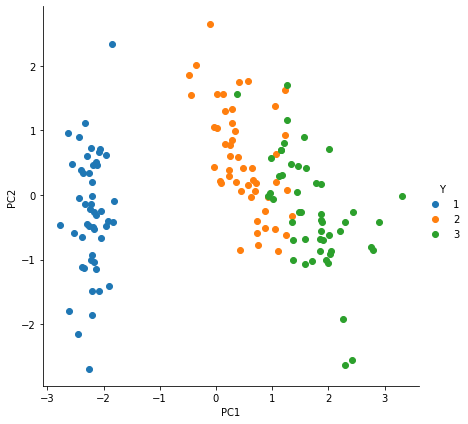

In [16]:
sns.FacetGrid(res,hue="Y",height=6).map(plt.scatter,"PC1","PC2").add_legend()